Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset into dataframe

In [2]:
df=pd.read_csv("personality_datasert.csv")

Basic understanding of the data

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.shape

(2900, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(402)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True) 

Outlier Detection

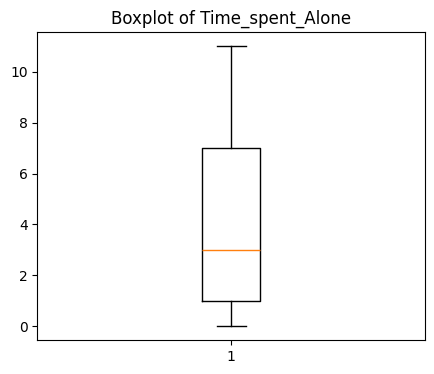

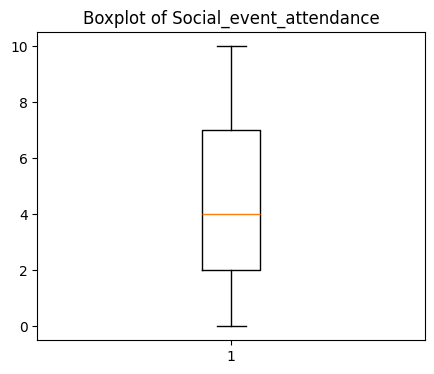

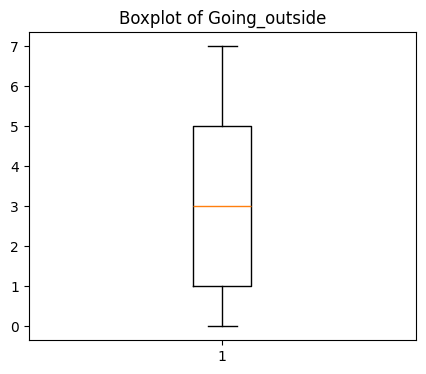

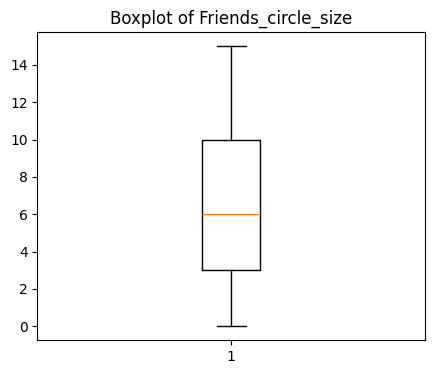

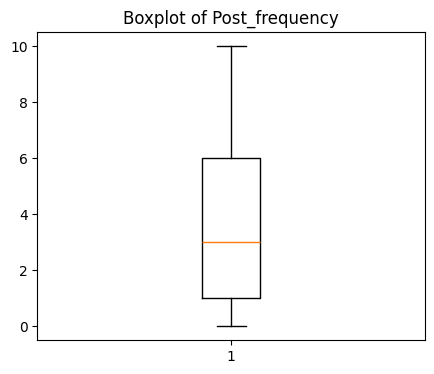

In [11]:
for i in df:
    if df[i].dtype in ['int64', 'float64']:
        plt.figure(figsize=(5, 4))
        plt.boxplot(df[i])
        plt.title(f'Boxplot of {i}')
        plt.show()

Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encode = ['Personality','Drained_after_socializing', 'Stage_fear']

le_dict = {}
for i in label_encode:
    le_dict[i] = LabelEncoder()
    df[i] = le_dict[i].fit_transform(df[i])

In [13]:
df['Personality'].value_counts()

Personality
0    1403
1    1095
Name: count, dtype: int64

In [14]:
x=df.drop(columns='Personality')
y=df['Personality']

In [15]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_scaled = minmax.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

GradientBoostingClassifier()
90.8
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       279
           1       0.88      0.92      0.90       221

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



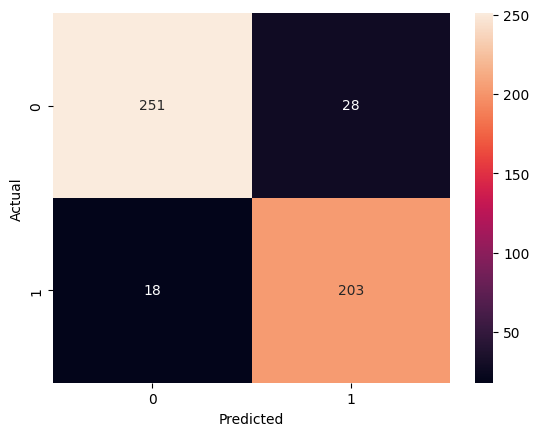

-----------------------------------
GaussianNB()
90.8
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       279
           1       0.88      0.92      0.90       221

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



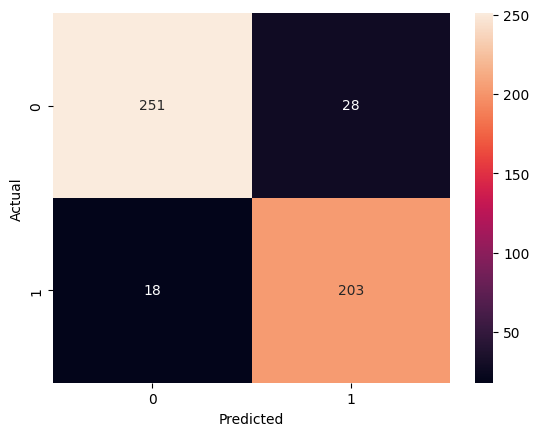

-----------------------------------
DecisionTreeClassifier()
82.6
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       279
           1       0.80      0.80      0.80       221

    accuracy                           0.83       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.83      0.83       500



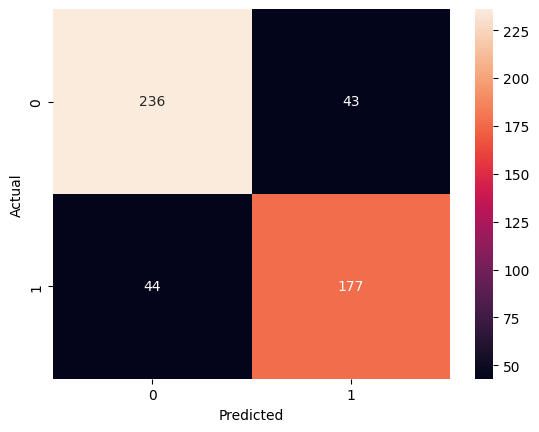

-----------------------------------
KNeighborsClassifier()
90.2
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       279
           1       0.87      0.92      0.89       221

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



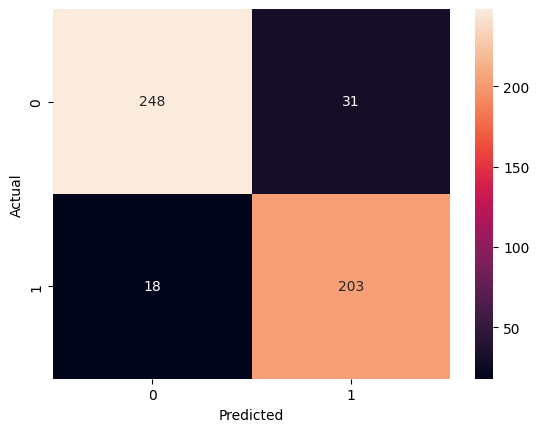

-----------------------------------
RandomForestClassifier()
88.2
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       279
           1       0.86      0.88      0.87       221

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



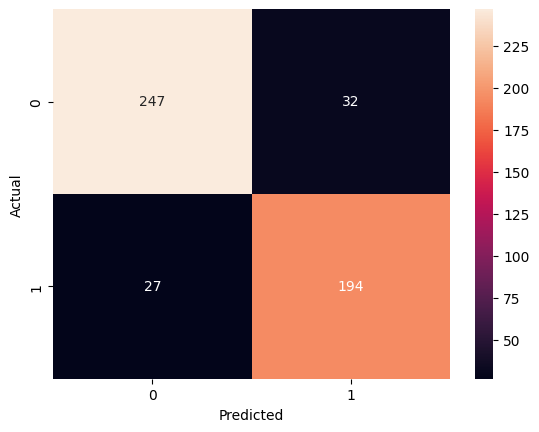

-----------------------------------
SVC()
90.6
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       279
           1       0.88      0.91      0.90       221

    accuracy                           0.91       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



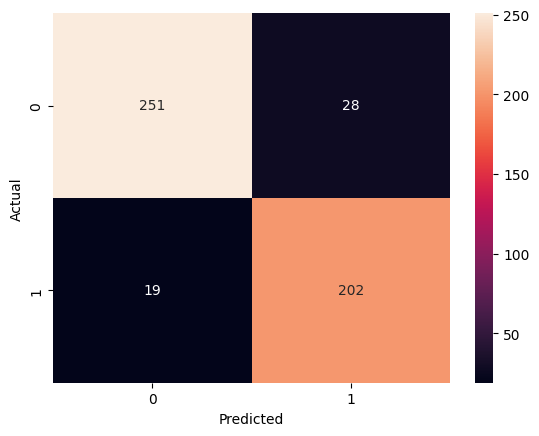

-----------------------------------


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models={KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), GaussianNB(),RandomForestClassifier(), GradientBoostingClassifier()}
for model in models:
    model.fit(x_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test)
    print(model)
    print(round(accuracy_score(y_test, y_pred)*100,2))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-----------------------------------")

In [20]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(), x_scaled, y, cv=5).mean())


0.9263230460921843


In [21]:
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [24]:
y_test.values

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

ROC curver and AUC

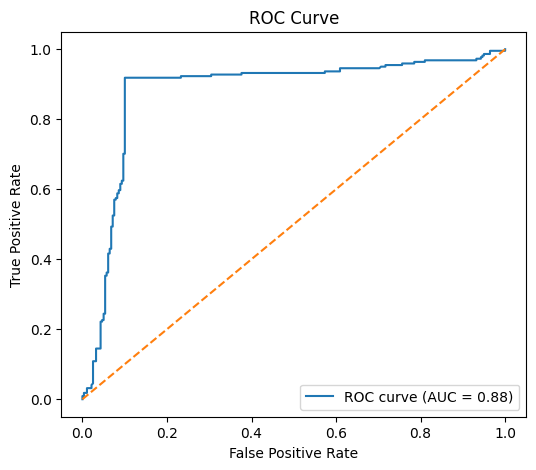

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get FPR, TPR
y_proba = model.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

# Step 3: Plot the curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
x.sample(1)
test_data=[[5,1,4,2,0,5,0]]
test=minmax.transform(test_data)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
data={'model':model, 'scaler':minmax, 'features':list(x.columns)}

In [ ]:
import pickle
with open('personality_prediction.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('personality_prediction.pkl', 'rb') as file:
    a = pickle.load(file)

In [ ]:
a['model'].predict(test)

array([1])